# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


## Desarrollo

### 1. Análisis exploratorio inicial
Visualizar las primeras filas.
Realizar un resumen de 5 números.
Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
Identificar las variables de entrada y de salida del problema.
Variables de entrada:
Realizar los siguientes análisis por tipo de variable.
Numéricas:
Obtener conclusiones acerca de la distribución de los datos.
Categóricas
Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
Variables de salida:
¿Están balanceadas las clases?
¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### Defino una función que me asegura si puedo aplicar CCA

In [103]:
def cca(columna):
    m = columna.shape[0]
    porc_minimo = (5*m)/100
    num_nul = columna.isnull().sum()
    if num_nul < porc_minimo:
        return True
    else:
        return False

In [104]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

In [105]:
def col_cca_nocca(columnas):    
    cca_columns = []
    no_cca_columns = []
    for i in columnas:
        if cca(df[i]):
            cca_columns.append(i)
        else:
            no_cca_columns.append(i)
    return cca_columns, no_cca_columns

In [106]:
def mayor_35(columnas):
    m = columnas.shape[0]
    porc_minimo = (35*m)/100
    num_nul = columnas.isnull().sum()
    if num_nul > porc_minimo:
        return True
    else:
        return False
    

In [113]:
def col_mayor_35(columnas):    
    col_mayor_35 = []
    no_col_mayor_35 = []
    for i in columnas:
        if mayor_35(df[i]):
            col_mayor_35.append(i)
        else:
            no_col_mayor_35.append(i)
    return col_mayor_35, no_col_mayor_35

In [108]:
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [109]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [110]:
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

### Vemos como van los datos nulos

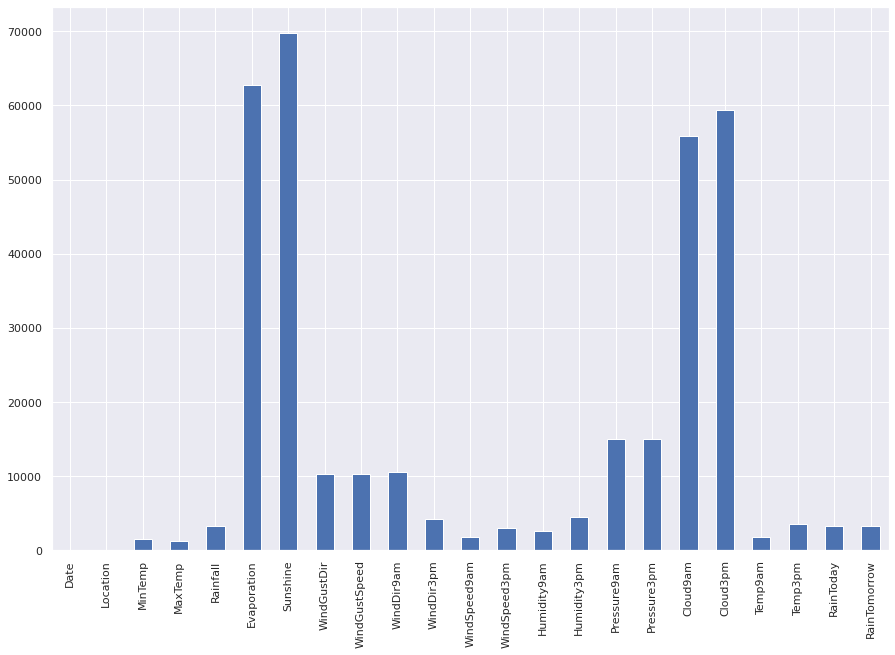

In [111]:
df.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

In [114]:
columnas = np.array(df.columns)
col_mayor_35, no_col_mayor_35 = col_mayor_35(columnas)
print(col_mayor_35)
print(no_col_mayor_35)

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [115]:
# Elimino los que tengan mas del 50% de datos faltantes
df = df.drop(columns=col_mayor_35,axis=1)

In [116]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


<AxesSubplot:>

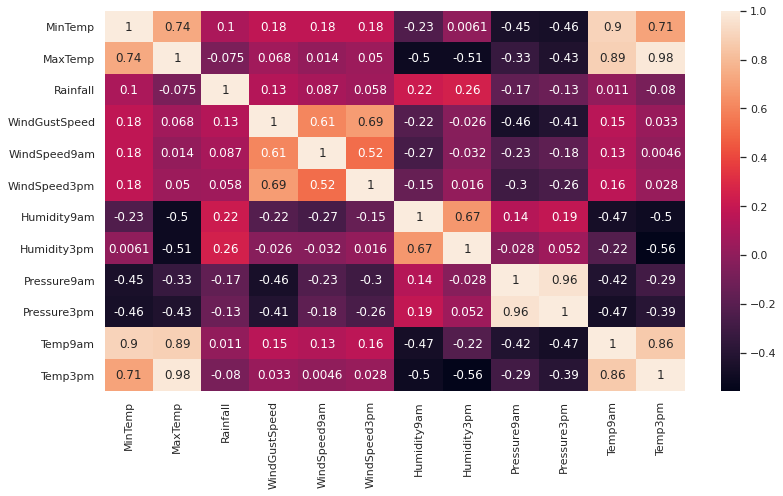

In [117]:
plt.figure(figsize=(13,7))

sns.heatmap(df.corr(),annot=True)

In [118]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

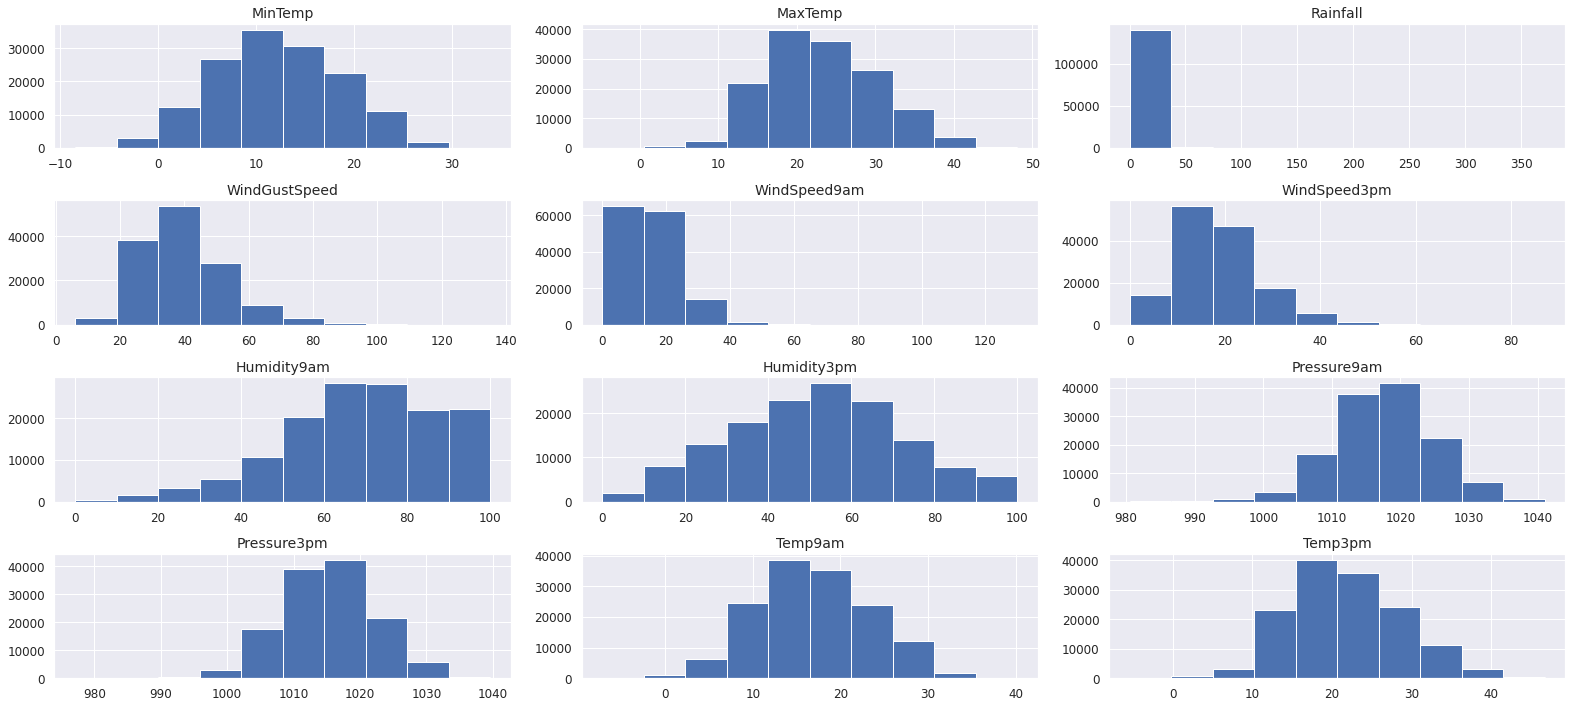

In [100]:
display_dataset_distributions(df)

In [15]:
columnas = np.array(df.columns)

In [16]:
columnas

array(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'], dtype=object)

In [18]:
cca_columns, no_cca_columns = col_cca_nocca(columnas)

### Tratamiento en columnas que no se puede hacer CCA

In [19]:
no_cca_columns

['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'Pressure9am', 'Pressure3pm']

#### Tratamiento en las columnas numericas

In [21]:
numerical_col = df[no_cca_columns]._get_numeric_data().columns

array([[<AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>],
       [<AxesSubplot:title={'center':'Pressure3pm'}>, <AxesSubplot:>]],
      dtype=object)

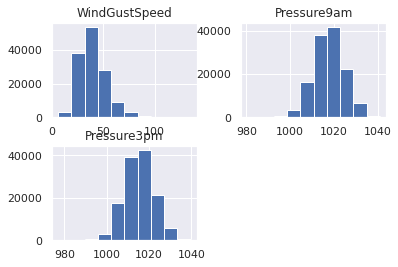

In [24]:
df[numerical_col].hist()

<AxesSubplot:>

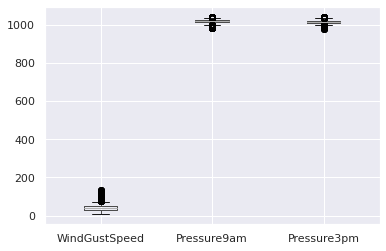

In [25]:
df[numerical_col].boxplot()

#### Imputación por mediana

In [70]:
df["WindGustSpeed"].isnull().sum()

10263

In [71]:
# Reemplazar valores por la mediana por que tiene oblicuidad:
df["WindGustSpeed"].fillna(value=df["WindGustSpeed"].median(), inplace=True)
print(df["WindGustSpeed"].isnull().sum())

0


#### Imputación por media

In [72]:
# Reemplazando con mean
df["Pressure9am"].isnull().sum()

15065

In [73]:
df["Pressure9am"].fillna(value=df["Pressure9am"].mean(), inplace=True)
print(df["Pressure9am"].isnull().sum())

0


In [74]:
# Reemplazando con mean
df["Pressure3pm"].isnull().sum()

15028

In [75]:
df["Pressure3pm"].fillna(value=df["Pressure3pm"].mean(), inplace=True)
print(df["Pressure3pm"].isnull().sum())

0


#### Tratamiento en las columnas continuas

In [76]:
df['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [77]:
df['WindGustDir'].isnull().sum()

10326

In [78]:
df['WindGustDir'].shape[0]

145460

In [61]:
cca_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [54]:
df.isna().sum().sort_values() 

MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
RainToday         3261
Rainfall          3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
dtype: int64

In [5]:
numerical_col = df._get_numeric_data().columns
numerical_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Inicio de tratamientos

#### Primero copio el dataframe

In [33]:
df2 = df.copy()

##### Tratamiento de columna Location

In [34]:
df2["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

##### Revision de columna RainToday

In [35]:
df2["RainToday"].unique()

array(['No', 'Yes', nan], dtype=object)

In [36]:
df2['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [38]:
# Compruebo si puedo aplicar CCA en la columna "RainToday"
cca(df2['RainToday'])

True

##### Tratamiento de columna RainTomorrow

In [22]:
df["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [39]:
# Compruebo si puedo aplicar CCA en la columna "RainTomorrow"
cca(df2['RainTomorrow'])

True